In [2]:
import torch
import numpy as np
from torch import nn
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

# Classificação

In [4]:
from sklearn import datasets

wine = datasets.load_wine()
data = wine.data
target = wine.target

print(data.shape, target.shape)
print(wine.feature_names, wine.target_names)

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'] ['class_0' 'class_1' 'class_2']


In [5]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(WineClassifier, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
        feature = self.relu( self.hidden(X) )
        output = self.softmax( self.out(feature) )

        return output

input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names)

net = WineClassifier(input_size, hidden_size, out_size).to(device)

In [6]:
criterion = nn.CrossEntropyLoss().to(device)

In [7]:
X_tensor = torch.from_numpy( data ).float().to(device)
y_tensor = torch.from_numpy( target ).long().to(device)

print(X_tensor.dtype, y_tensor.dtype)

torch.float32 torch.int64


In [8]:
pred = net(X_tensor[0].unsqueeze(0))

print(X_tensor[0].unsqueeze(0).shape)
print(pred.shape)

torch.Size([1, 13])
torch.Size([1, 3])


C:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [9]:
pred = net(X_tensor)

print(X_tensor.shape)
print(pred.shape)

torch.Size([178, 13])
torch.Size([178, 3])


In [10]:
print(pred.dtype, y_tensor.dtype)
print(pred.shape, y_tensor.shape)

torch.float32 torch.int64
torch.Size([178, 3]) torch.Size([178])


In [11]:
loss = criterion( pred, y_tensor )
print(loss)

tensor(1.2818, grad_fn=<NllLossBackward0>)


# Regressão

In [12]:
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

print(data.shape, target.shape)
print(data[0])
print(target[0])

(442, 10) (442,)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
151.0


In [13]:
class DiabetesRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(DiabetesRegressor, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
        feature = self.relu( self.hidden(X) )
        output = self.softmax( self.out(feature) )

        return output

input_size = data.shape[1]
hidden_size = 32
out_size = 1

net = DiabetesRegressor(input_size, hidden_size, out_size).to(device)

In [14]:
criterion = nn.MSELoss().to(device)

In [15]:
X_tensor = torch.from_numpy(data).float().to(device)
y_tensor = torch.from_numpy(target).float().to(device)

print(X_tensor.shape, y_tensor.shape)

torch.Size([442, 10]) torch.Size([442])


In [16]:
pred = net(X_tensor)

print(pred.shape, y_tensor.shape)

torch.Size([442, 1]) torch.Size([442])


C:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [17]:
loss = criterion( pred.squeeze() , y_tensor )
print(loss)

tensor(28771.2148, grad_fn=<MseLossBackward0>)


# Otimização

Text(0, 0.5, 'malic_acid')

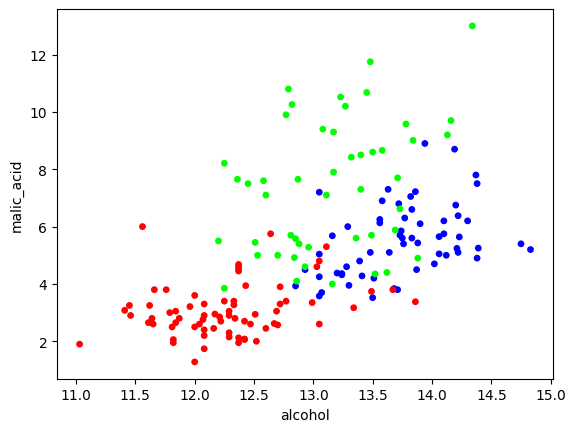

In [18]:
from sklearn import datasets

features = [0,9]

wine = datasets.load_wine()
data = wine.data[:, features]
targets = wine.target

plt.scatter( data[:, 0], data[:, 1], c = targets, cmap = plt.cm.brg, s = 15)
plt.xlabel( wine.feature_names[0] )
plt.ylabel( wine.feature_names[1] )

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)


In [20]:
class WineClassifierV2(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(WineClassifierV2, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
        feature = self.relu( self.hidden(X) )
        output = self.softmax( self.out(feature) )

        return output

input_size = data.shape[1]
hidden_size = 32
out_size = len(wine.target_names)

net = WineClassifierV2(input_size, hidden_size, out_size).to(device)

In [21]:
def plot_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1

    spacing = min(x_max - x_min , y_max - y_min) / 100

    XX, YY = np.meshgrid( np.arange(x_min, x_max, spacing), np.arange(y_min, y_max, spacing) )

    data = np.hstack(( XX.ravel().reshape(-1, 1), YY.ravel().reshape(-1, 1) ))

    db_prob = model( torch.Tensor( data ).to(device) )
    clf = np.argmax( db_prob.cpu().data.numpy(), axis = -1 )

    Z = clf.reshape(XX.shape)

    plt.contourf( XX, YY, Z, cmap = plt.cm.brg, alpha = 0.5 )
    plt.scatter( X[:, 0], X[:, 1], c = y, edgecolors = "k", s = 25, cmap = plt.cm.brg )

C:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


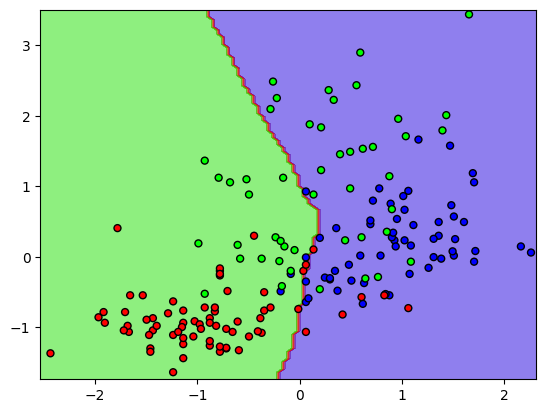

In [22]:
plot_boundary(data, targets, net)

In [23]:
from torch import optim

# Função de perda
criterion = nn.CrossEntropyLoss().to(device)

# Otimizador
optimizer = optim.SGD(net.parameters(), lr = 1e-3)

In [24]:
X_tensor = torch.FloatTensor(data).to(device)
y_tensor = torch.LongTensor(targets).to(device)

C:\Users\Pichau\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


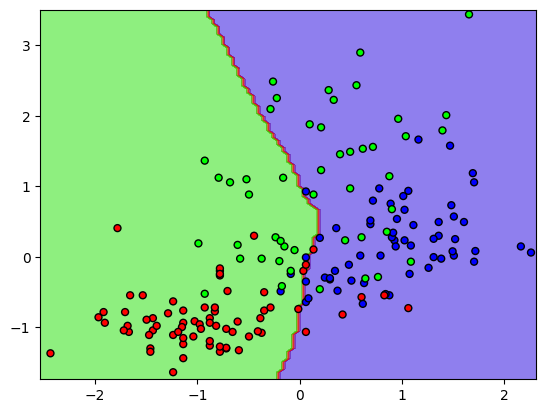

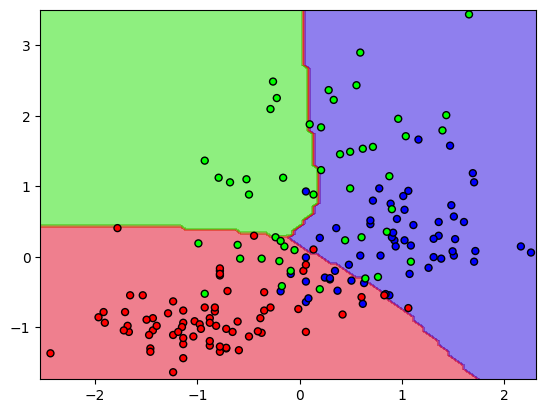

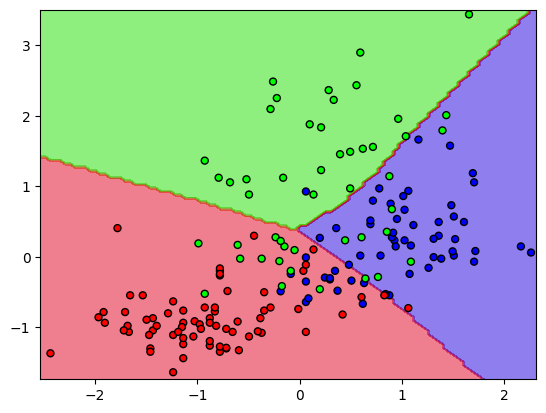

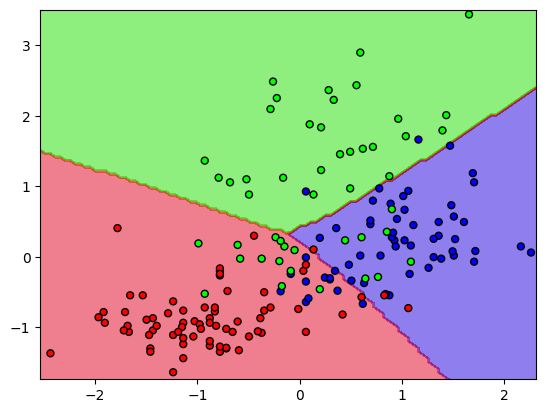

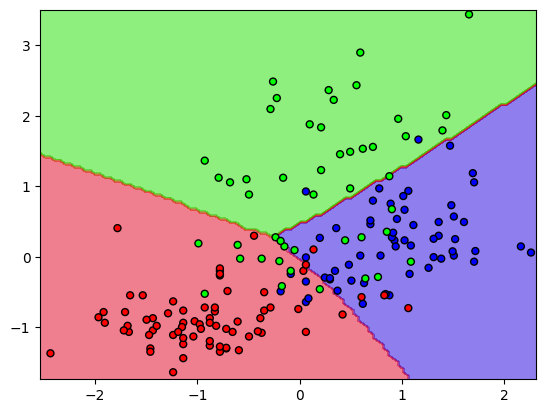

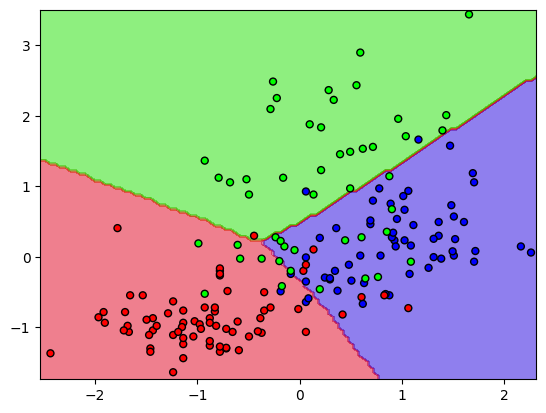

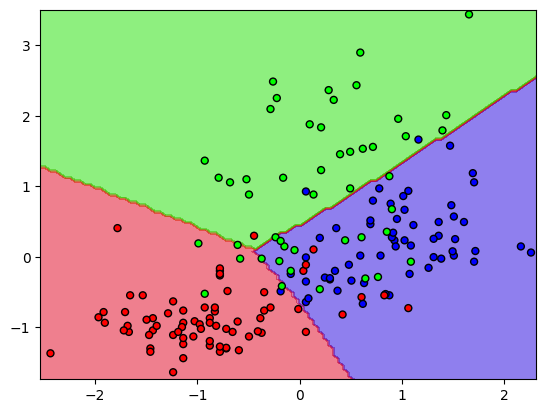

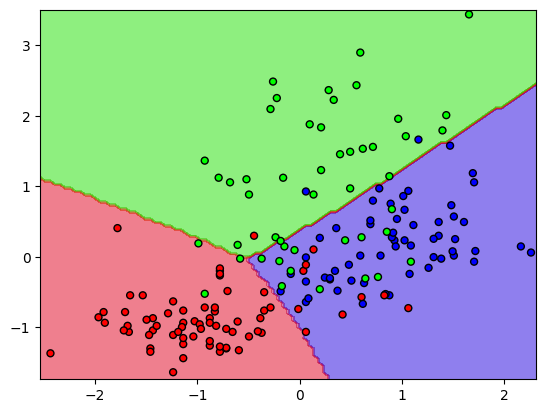

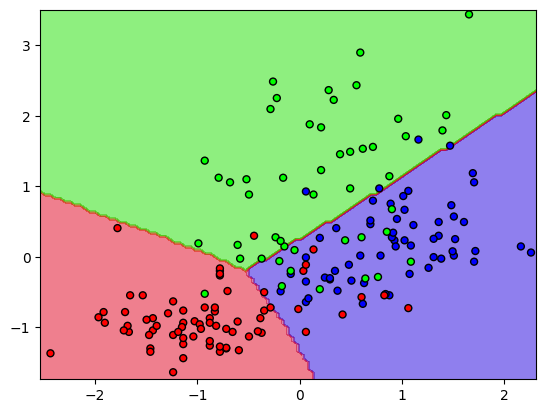

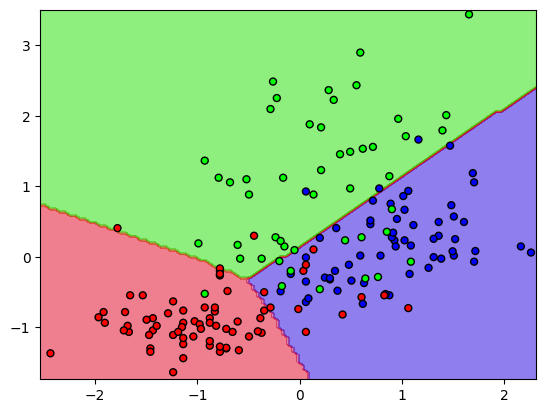

In [25]:

for i in range(500):
    # Forward
    
    pred = net(X_tensor)
    loss = criterion( pred, y_tensor )
    
    # Backward
    
    g = loss.backward()
    optimizer.step()

    if i%50 == 0:
        plt.figure()
        plot_boundary(data, targets, net)

# Otimizações

### -- Parâmetros --
- momentum: "Inércia" da velocidade do gradiente em determinado ponto
- nesterov (booleano): Utizado para problemas simples de gradiente, pequena modificação na matemática do momentum
- weight_decay: Regularização L2

### -- Otimizadores --
- Adagrad
- Adadelta
- RMSprop
- Adam (melhor)

# Batch, Iteração, Época

- Batch: Grupos dos dados de treino
- Iteração: Execução da etapa de forward e backprogapation em um Batch
- Época: Quando todas as amostras (todos os Batchs) dos dados de treino foram vistas pelo modelo (dividir pela quantidade de Batchs)

# Datasets do pytorch

In [26]:
from torchvision import datasets, transforms

args = {
    "batch_size" : 20
}

In [27]:
train_set = datasets.MNIST(root = "./",
                           train = True,
                           transform = transforms.ToTensor(),
                           download = True
                           )

test_set = datasets.MNIST(root = "./",
                           train = False,
                           transform = transforms.ToTensor(),
                           download = True
                           )

print("Amostras de treino:", len(train_set))
print("Amostras de teste:", len(test_set))

Amostras de treino: 60000
Amostras de teste: 10000


In [28]:
print(type(train_set))
print(type(train_set[0]))

<class 'torchvision.datasets.mnist.MNIST'>
<class 'tuple'>


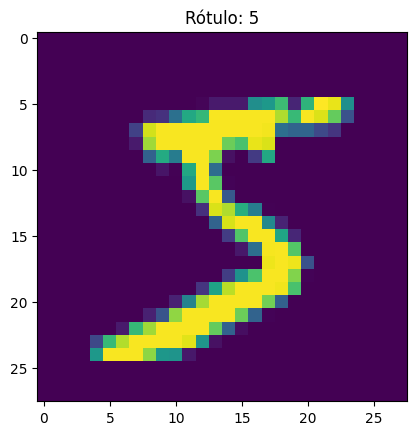

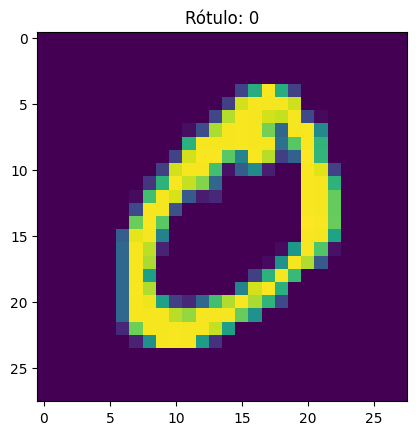

In [29]:
for i in range(2):
    dado, rotulo = train_set[i]

    plt.figure()
    plt.imshow( dado[0] )
    plt.title("Rótulo: " + str(rotulo))

In [30]:
from torch.utils.data import DataLoader

train_loader = DataLoader( train_set,
                           batch_size = args["batch_size"],
                           shuffle = True,
                           num_workers = 4)

test_loader = DataLoader(  test_set,
                           batch_size = args["batch_size"],
                           shuffle = True,
                           num_workers = 4)

torch.Size([20, 1, 28, 28]) torch.Size([20])


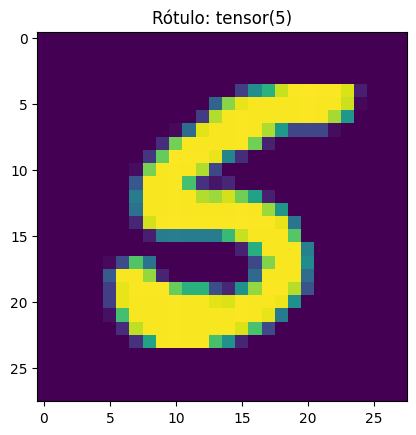

In [31]:
for batch in train_loader:

    dado, rotulo = batch
    print(dado.size(), rotulo.size())

    plt.figure()
    plt.imshow( dado[0][0] )
    plt.title("Rótulo: " + str(rotulo[0]))
    break

## Implementando o MLP

In [32]:
class MNISTClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(MNISTClassifier, self).__init__()

        self.features = nn.Sequential(nn.Linear(input_size, hidden_size),
                                      nn.ReLU(),
                                      nn.Linear(hidden_size, hidden_size),
                                      nn.ReLU(),
                                    )


        self.out = nn.Linear(hidden_size, out_size)
        self.softmax = nn.Softmax()

    def forward(self, X):
        X = X.view(X.size(0), -1)
        
        feature = self.features( X )
        output = self.softmax( self.out(feature) )

        return output

input_size = 28 * 28
hidden_size = 128
out_size = 10

net = MNISTClassifier(input_size, hidden_size, out_size).to(device)

In [33]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 1e-5, weight_decay = 5e-3)

## Fluxo de treinamento

In [34]:
import time


for epoch in range( 10 ):
    epoch_loss = []
    tempo_inicio = time.time()
    for batch in train_loader:
        dado, rotulo = batch

        dado = dado.to(device)
        rotulo = rotulo.to(device)

        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray( epoch_loss )
    print("Época %d, Loss: %.4f += %.4f, Tempo: %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std(), time.time() - tempo_inicio ) )

Época 0, Loss: 1.9141 += 0.2324, Tempo: 9.4192
Época 1, Loss: 1.6515 += 0.0845, Tempo: 9.2755
Época 2, Loss: 1.6342 += 0.0814, Tempo: 9.7465
Época 3, Loss: 1.6282 += 0.0826, Tempo: 9.9505
Época 4, Loss: 1.6240 += 0.0813, Tempo: 9.9272
Época 5, Loss: 1.6229 += 0.0801, Tempo: 10.3775
Época 6, Loss: 1.6248 += 0.0811, Tempo: 9.8060
Época 7, Loss: 1.6256 += 0.0830, Tempo: 9.6811
Época 8, Loss: 1.6220 += 0.0818, Tempo: 9.8194
Época 9, Loss: 1.6238 += 0.0823, Tempo: 10.0915


batch_size 5: Não convergiu, Tempo médio: em torno de 22s  
batch_size 20: Abaixo de 1.6 na época 3, Tempo médio: em torno de 11s  
batch_size 100: Convergiu levemente, mas não chegou abaixo de 1.6 (em 10 épocas), Tempo médio: em torno de 5.6s  

# Dataset Customizado

In [35]:
from torch.utils.data import Dataset

df = pd.read_csv("dados/hour.csv")
print(df.shape)
df.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
torch.manual_seed(1)

indices = torch.randperm( len(df) ).tolist()
train_size = int(len(df)*0.8)
df_train = df.iloc[ indices[:train_size] ]
df_test = df.iloc[ indices[train_size:] ]

print(df_train.shape, df_test.shape)

(13903, 17) (3476, 17)


In [37]:
df_train.to_csv("dados/bike_train.csv", index = False)
df_test.to_csv("dados/bike_test.csv", index = False)

In [38]:
class Bicicleta(Dataset):
    def __init__(self, csv_path):
        self.dados = pd.read_csv(csv_path).to_numpy()

    def __getitem__(self, idx):
        sample = self.dados[idx][2:14]
        label = self.dados[idx][-1:]

        amostra = torch.from_numpy(sample.astype(np.float32))
        rotulo = torch.from_numpy(label.astype(np.float32))

        return amostra, rotulo
    
    def __len__(self):
        return len( self.dados )



In [39]:
train_set = Bicicleta("dados/bike_train.csv")
test_set = Bicicleta("dados/bike_train.csv")

dado, rotulo = train_set[0]
print(rotulo)
print(dado)

tensor([373.])
tensor([ 4.0000,  1.0000, 11.0000, 19.0000,  0.0000,  4.0000,  1.0000,  1.0000,
         0.3800,  0.3939,  0.2700,  0.3582])


In [45]:
train_loader = DataLoader( train_set,
                           batch_size = args["batch_size"],
                           shuffle = True,
                           num_workers = 0)

test_loader = DataLoader(  test_set,
                           batch_size = args["batch_size"],
                           shuffle = True,
                           num_workers = 0)

In [46]:
type(train_set[0])

tuple

In [47]:
for batch in train_loader:

    dado, rotulo = batch
    print(dado.size(), rotulo.size())
    break

torch.Size([20, 12]) torch.Size([20, 1])


In [76]:
class BikeRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, out_size):
        super(BikeRegressor, self).__init__()

        self.features = nn.Sequential(nn.Linear(input_size, hidden_size),
                                      nn.ReLU(),
                                      nn.Linear(hidden_size, hidden_size),
                                      nn.ReLU(),
                                    )


        self.out = nn.Linear(hidden_size, out_size)

    def forward(self, X):
        X = X.view(X.size(0), -1)
        
        output = self.features( X )

        return output

input_size = len(train_set[0][0])
hidden_size = 128
out_size = 1

net = BikeRegressor(input_size, hidden_size, out_size)

In [77]:
criterion = nn.L1Loss().to(device)
optimizer = optim.Adam( net.parameters(), lr = 1e-04,  weight_decay = 1e-05)


In [78]:
def train(train_loader, net, epoch):
    net.train() # Setar para o modo de treinamento
    epoch_loss = []
    tempo_inicio = time.time()
    for batch in train_loader:
        dado, rotulo = batch

        dado = dado.to(device)
        rotulo = rotulo.to(device)

        # Forward
        pred = net(dado)
        loss = criterion(pred, rotulo)
        epoch_loss.append(loss.cpu().data)

        # Backward
        loss.backward()
        optimizer.step()

    epoch_loss = np.asarray( epoch_loss )
    if epoch%10 == 0:
        print("Época %d, Loss: %.4f += %.4f, Tempo: %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std(), time.time() - tempo_inicio ) )
    return epoch_loss.mean()

In [79]:
def test(test_loader, net, epoch):
    net.eval() # Setar para o modo de avaliação
    with torch.no_grad(): # Sem cálculo de gradiente
        epoch_loss = []
        tempo_inicio = time.time()
        for batch in test_loader:
            dado, rotulo = batch
    
            dado = dado.to(device)
            rotulo = rotulo.to(device)
    
            pred = net(dado)
            loss = criterion(pred, rotulo)
            epoch_loss.append(loss.cpu().data)

            # Não há backward aqui
    
        epoch_loss = np.asarray( epoch_loss )
        if epoch%10 == 0:
            print("Época %d, Loss: %.4f += %.4f, Tempo: %.4f" % (epoch, epoch_loss.mean(), epoch_loss.std(), time.time() - tempo_inicio ) )
        return epoch_loss.mean()

In [80]:
train_losses = []
test_losses = []
for epoch in range(100):
    train_losses.append(train(train_loader, net, epoch))
    test_losses.append(test(test_loader, net, epoch))
    if epoch%10 == 0:
        print("-----------------")

Época 0, Loss: 173.3649 += 42.1809, Tempo: 0.6862
Época 0, Loss: 149.5490 += 36.5598, Tempo: 0.2040
-----------------
Época 10, Loss: 111.8587 += 25.9317, Tempo: 0.8128
Época 10, Loss: 110.4843 += 25.9234, Tempo: 0.2404
-----------------
Época 20, Loss: 94.5174 += 23.8667, Tempo: 0.7189
Época 20, Loss: 94.0706 += 23.6579, Tempo: 0.2515
-----------------
Época 30, Loss: 89.8015 += 21.7640, Tempo: 0.7685
Época 30, Loss: 89.4252 += 22.8636, Tempo: 0.2441
-----------------
Época 40, Loss: 86.9649 += 22.5875, Tempo: 0.7447
Época 40, Loss: 86.2660 += 23.5478, Tempo: 0.2511
-----------------
Época 50, Loss: 86.0428 += 21.4838, Tempo: 0.7700
Época 50, Loss: 84.8076 += 22.5226, Tempo: 0.2329
-----------------
Época 60, Loss: 82.0831 += 20.0861, Tempo: 0.7851
Época 60, Loss: 78.7134 += 21.5558, Tempo: 0.2810
-----------------
Época 70, Loss: 82.8374 += 22.1947, Tempo: 0.7197
Época 70, Loss: 89.0291 += 25.3810, Tempo: 0.2226
-----------------
Época 80, Loss: 79.8713 += 20.7471, Tempo: 0.7262
Époc

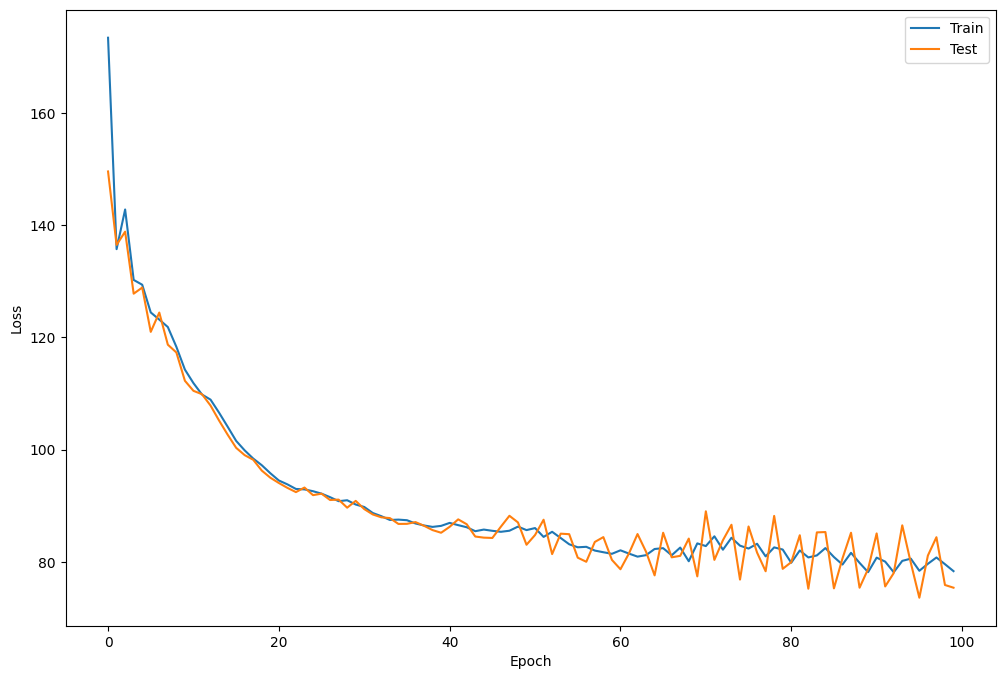

In [82]:
plt.figure( figsize = (12, 8) )
plt.plot(train_losses, label = "Train")
plt.plot(test_losses, label = "Test")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()